In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
sns.set_context("paper", font_scale = 2)

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [13]:
train = pd.read_csv('c:/Users/joe/desktop/train_2016_v2.csv',parse_dates=['transactiondate'])

In [3]:
# load the properties data
prp = pd.read_csv('c:/Users/joe/desktop/properties_2016.csv')

(90275, 3)

In [14]:
merged = pd.merge(train,prp,on='parcelid',how='left')

In [15]:
merged.head(3).transpose()

,0,1,2
parcelid,11016594,14366692,12098116
logerror,0.0276,-0.1684,-0.004
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
airconditioningtypeid,1,NaN,1
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,2,3.5,3
bedroomcnt,3,4,2
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


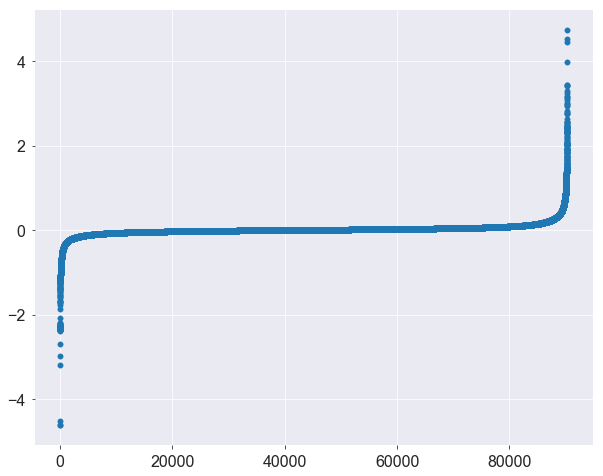

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(range(train.shape[0]),np.sort(train['logerror'].values))
plt.show()

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


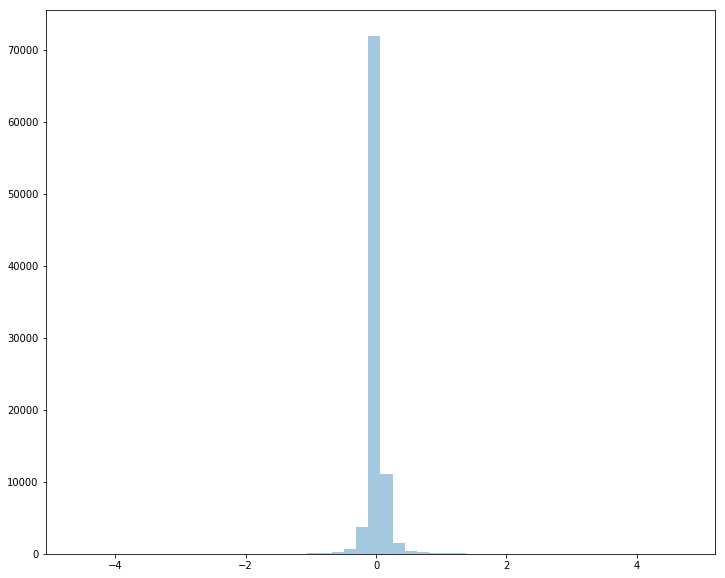

In [7]:
plt.figure(figsize=(12,10))
sns.distplot(train['logerror'].values,bins=50,kde=False)
plt.show()

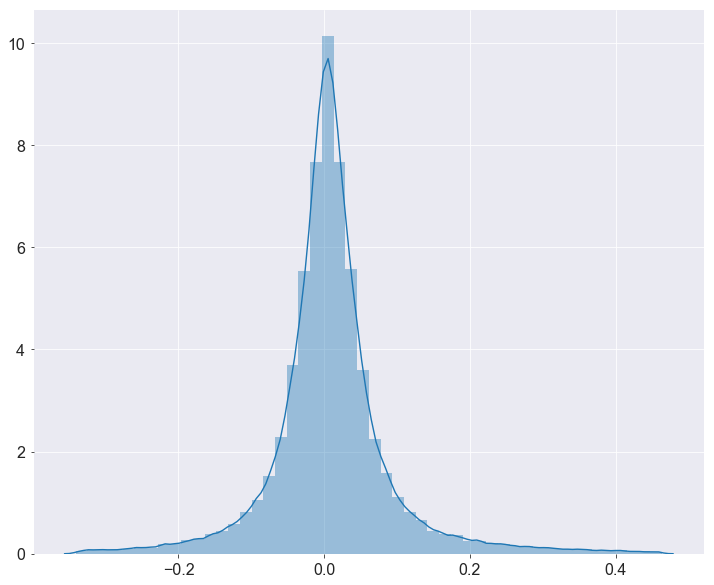

In [72]:
# remove outliers 
plt.figure(figsize=(12,10))
high = np.percentile(train['logerror'].values, 99)
low = np.percentile(train['logerror'].values, 1)
train_or = train[(train['logerror']<high) & (train['logerror']>low)]
sns.distplot(train_or['logerror'].values,bins=50,kde=True)
plt.show()

In [12]:
train['transactiondate'] = pd.to_datetime(train['transactiondate'])
train['year'],train['quarter'],train['month'],train['day'] = train['transactiondate'].dt.year,train['transactiondate'].dt.to_period('Q'),train['transactiondate'].dt.month,train['transactiondate'].dt.day

In [21]:
# Count the number of transactions by time period
month_count = train['month'].value_counts()
quarter_count = train['quarter'].value_counts()

In [73]:
# number of transactions by quarter
plt.figure(figsize=(12,10))
sns.barplot(quarter_count.index,quarter_count.values,alpha=0.8, palette='deep')
plt.xticks(rotation = 'vertical')
plt.show()

NameError: name 'quarter_count' is not defined

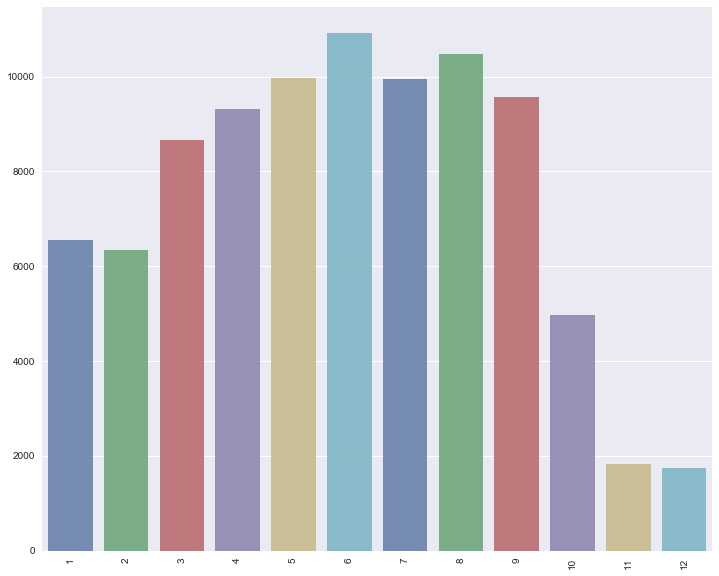

In [20]:
# number of transactions by month
plt.figure(figsize=(12,10))
sns.barplot(month_count.index,month_count.values,alpha=0.8, palette='deep')
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Joe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
prp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

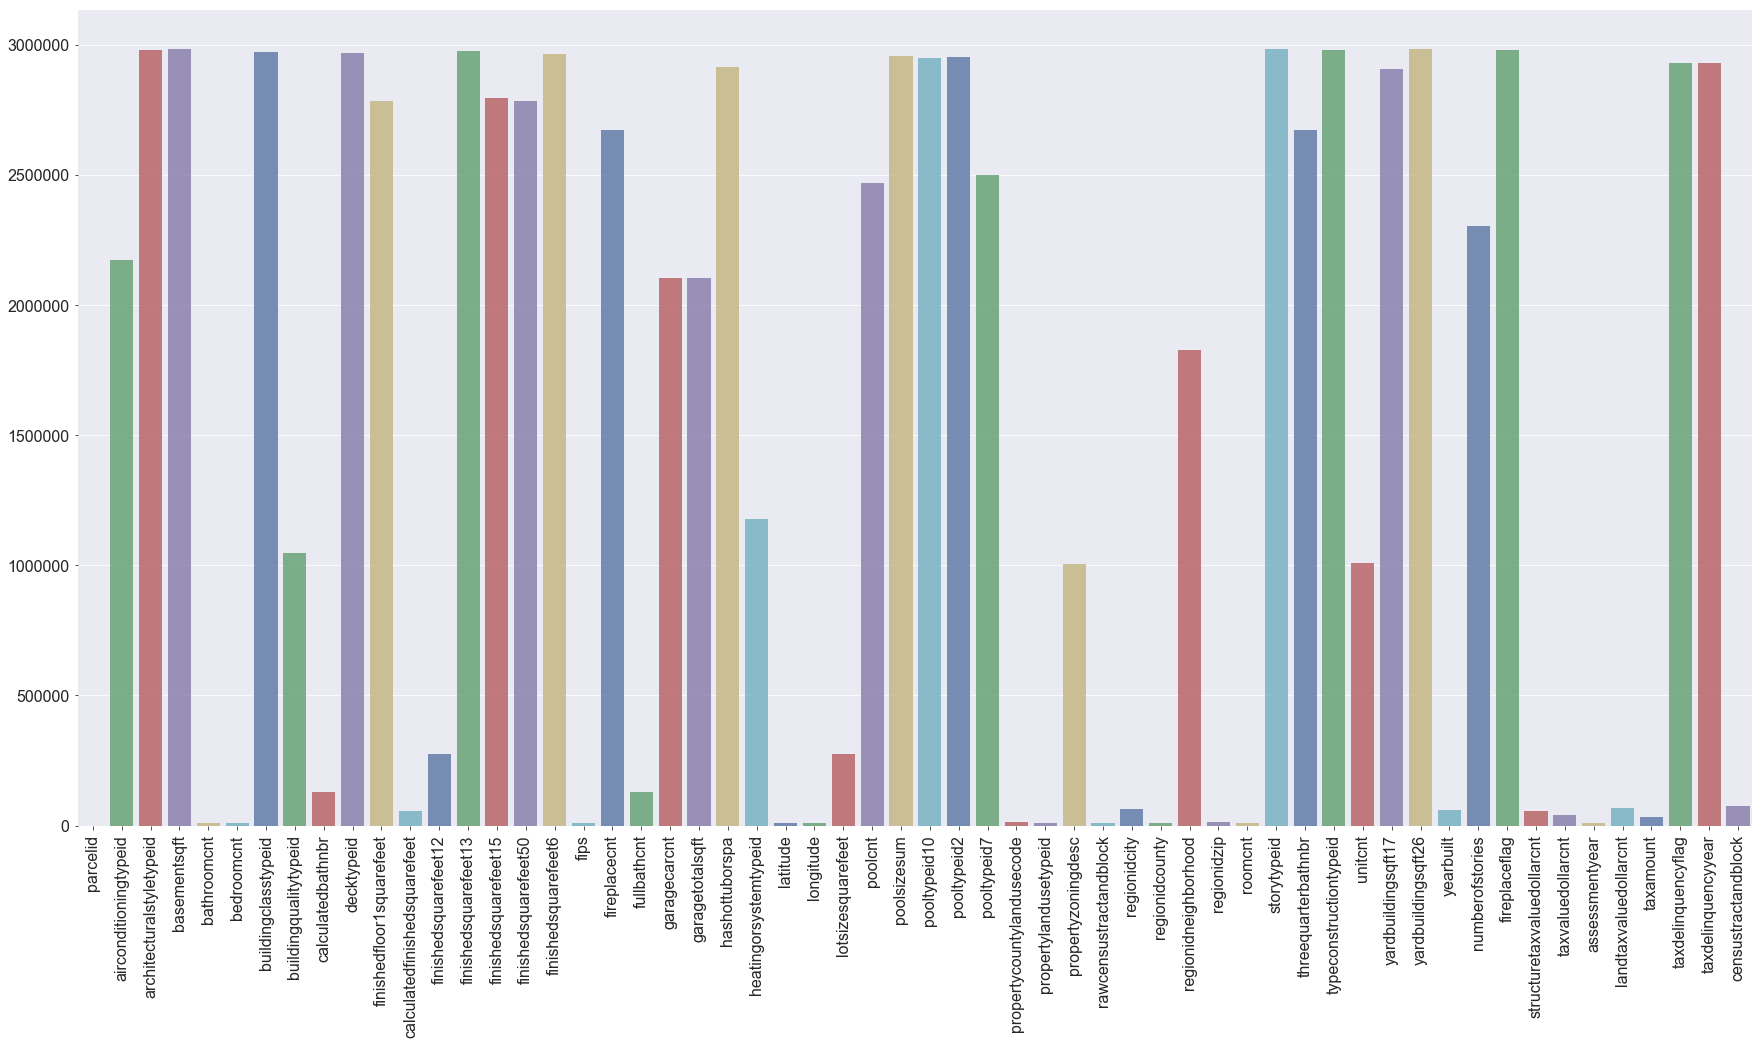

In [74]:
plt.figure(figsize=(30,15))
sns.barplot(prp.isnull().sum().index,prp.isnull().sum().values,alpha=0.8, palette='deep')
plt.xticks(rotation = 'vertical')
plt.show()

In [69]:
pandas_profiling.ProfileReport(merged)

Number of variables,60
Number of observations,90275
Total Missing (%),37.1%
Total size in memory,42.0 MiB
Average record size in memory,488.0 B
Numeric,32
Categorical,6
Boolean,7
Date,1
Text (Unique),0
Rejected,14


C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x864 with 0 Axes>

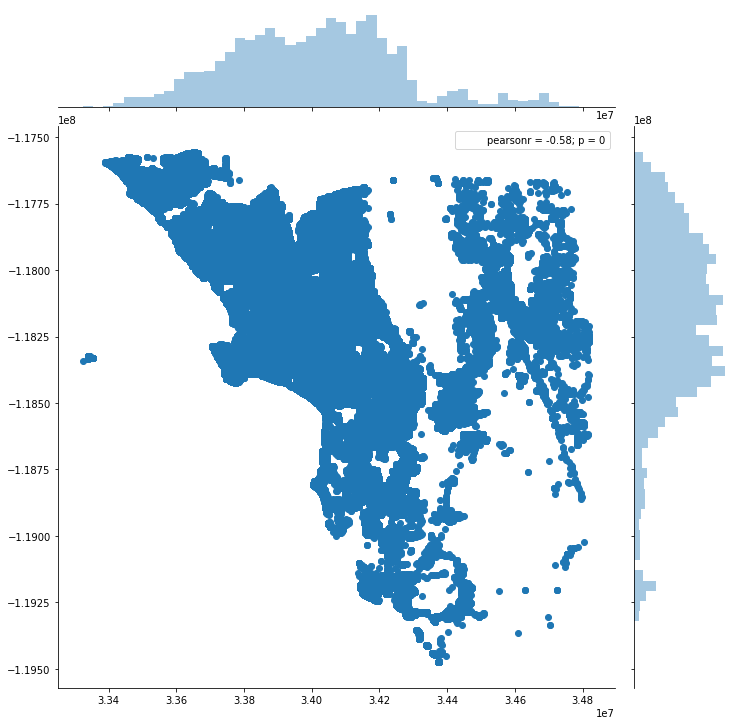

In [14]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prp['latitude'].values,y=prp['longitude'].values,size=10)
plt.show()

In [12]:
prp['regionidcity'].value_counts()

12447.0     670925
46298.0      93470
16764.0      59802
52650.0      58234
25218.0      56962
54311.0      54277
5534.0       49074
47568.0      47758
40227.0      46231
13150.0      41995
34278.0      38774
27110.0      37815
45457.0      36130
54722.0      35622
24832.0      34441
47019.0      33795
33252.0      33337
34543.0      32535
12773.0      31382
24812.0      30319
20008.0      29241
14542.0      25759
53571.0      25029
51239.0      24656
396054.0     24600
24174.0      24164
12292.0      23038
21412.0      22538
32380.0      22312
33612.0      22267
             ...  
3491.0        1076
53162.0        860
114834.0       798
6822.0         781
16389.0        756
13232.0        719
25271.0        696
34037.0        664
38980.0        625
42091.0        596
25621.0        584
33312.0        448
14906.0        423
118880.0       402
13311.0        183
32927.0        183
10815.0        110
41484.0         88
21395.0         77
19202.0         24
48211.0         23
25535.0     

In [8]:
prp['latitude'].head()

0    34144442.0
1    34140430.0
2    33989359.0
3    34148863.0
4    34194168.0
Name: latitude, dtype: float64

In [19]:
import missingno as msno

In [16]:
missing = merged.columns[merged.isnull().any()].tolist()

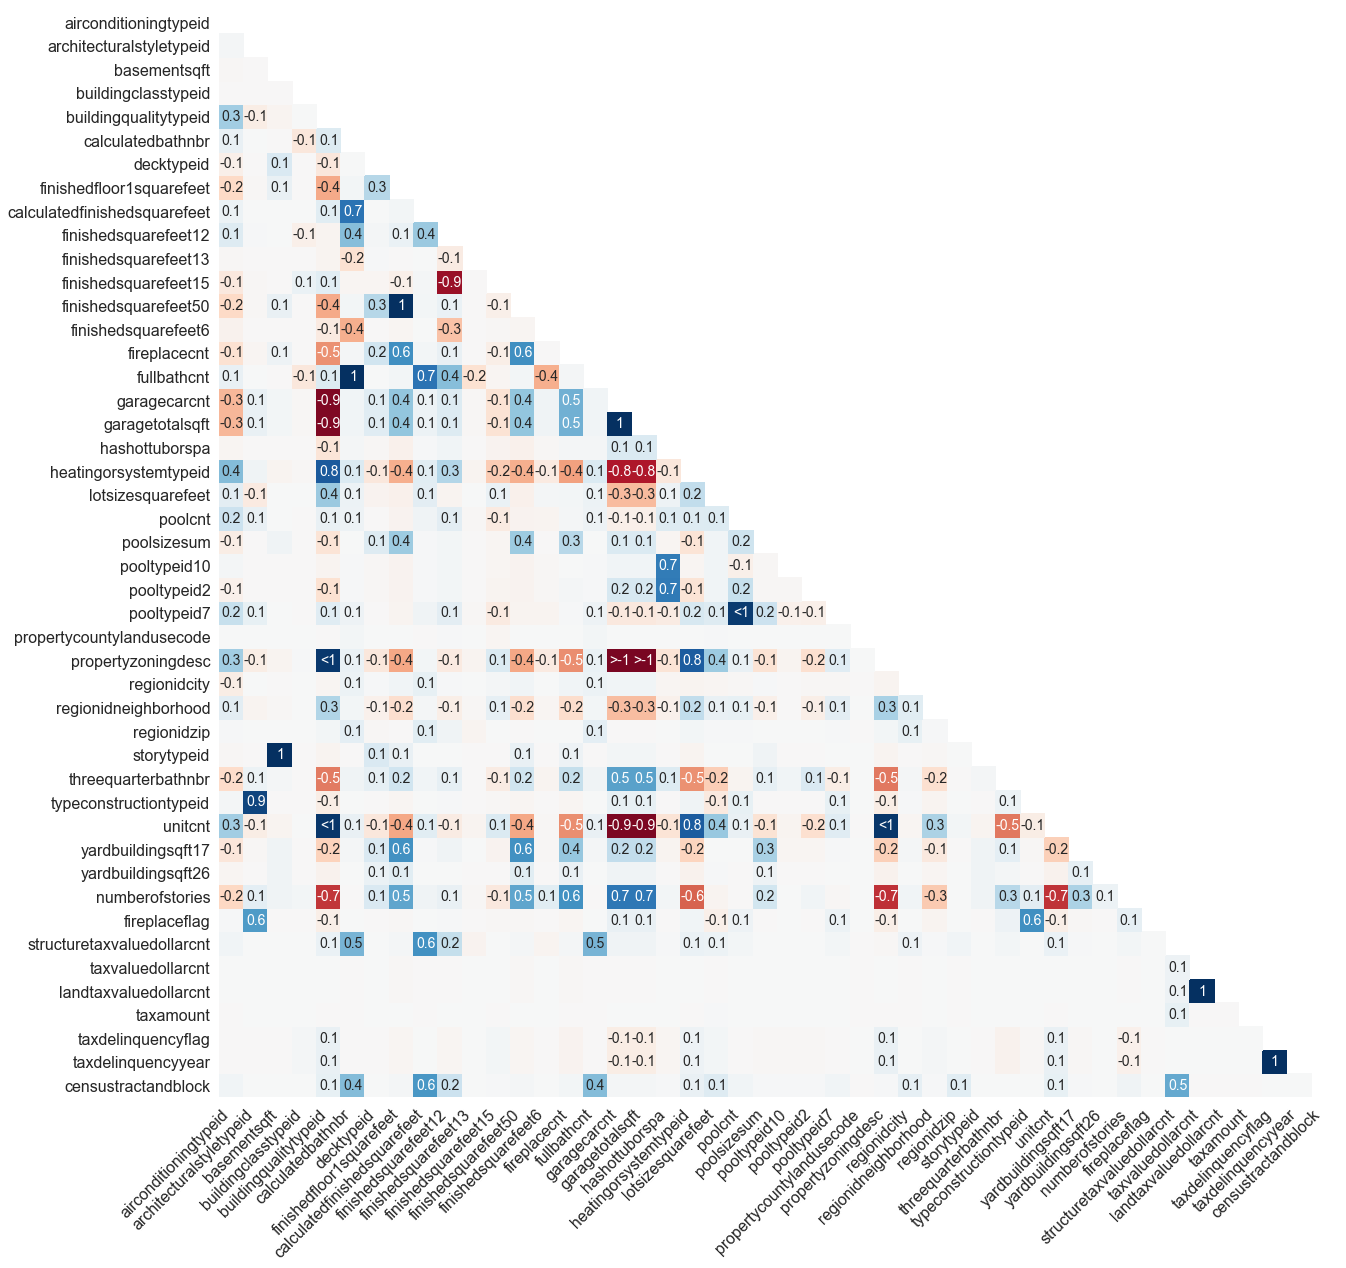

In [75]:
msno.heatmap(merged[missing],figsize=(20,20))

In [21]:
from sklearn import model_selection, preprocessing
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

mergedFilterd = merged.fillna(-999)
for f in mergedFilterd.columns:
    if mergedFilterd[f].dtype=='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(mergedFilterd[f].values)) 
        mergedFilterd[f] = lbl.transform(list(mergedFilterd[f].values))
        
train_y = mergedFilterd.logerror.values
train_X = mergedFilterd.drop(["parcelid", "transactiondate", "logerror"], axis=1)

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

[09:27:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[09:27:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=8
[09:27:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=8
[09:27:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=8
[09:27:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=8
[09:27:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=8
[09:27:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

[09:27:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=8
[09:27:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=8
[09:27:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=8
[09:27:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=8
[09:27:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=8
[09:28:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=8
[09:28:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pru

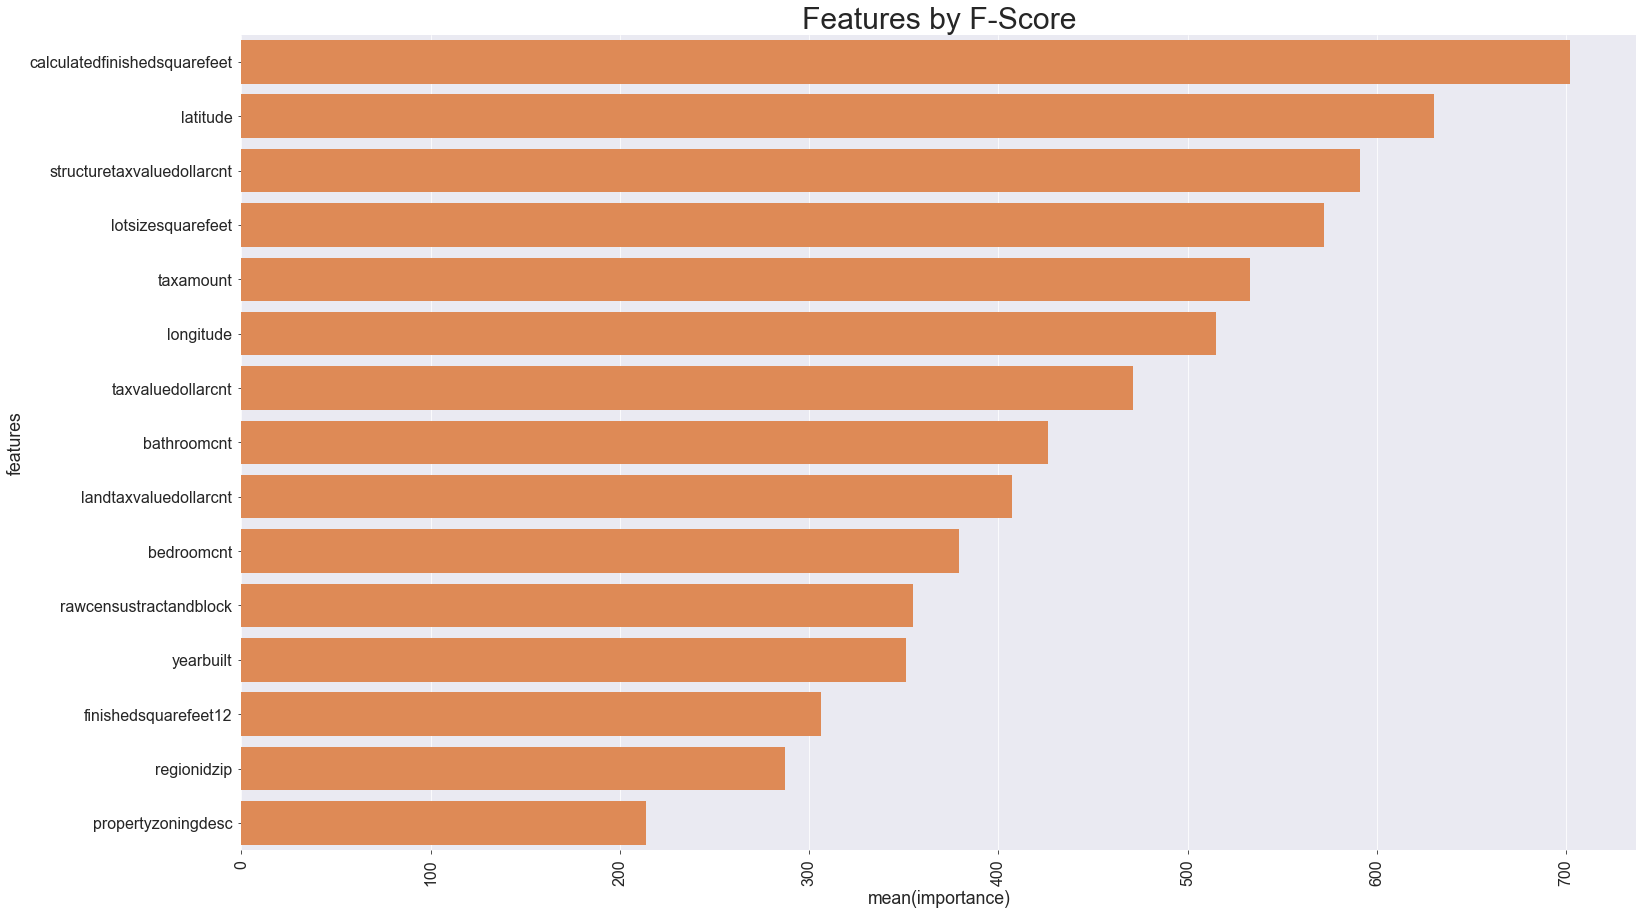

In [76]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
plt.xticks(rotation=90)
ax.set_title('Features by F-Score',fontsize=30)
sns.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h",color="#f5853f")

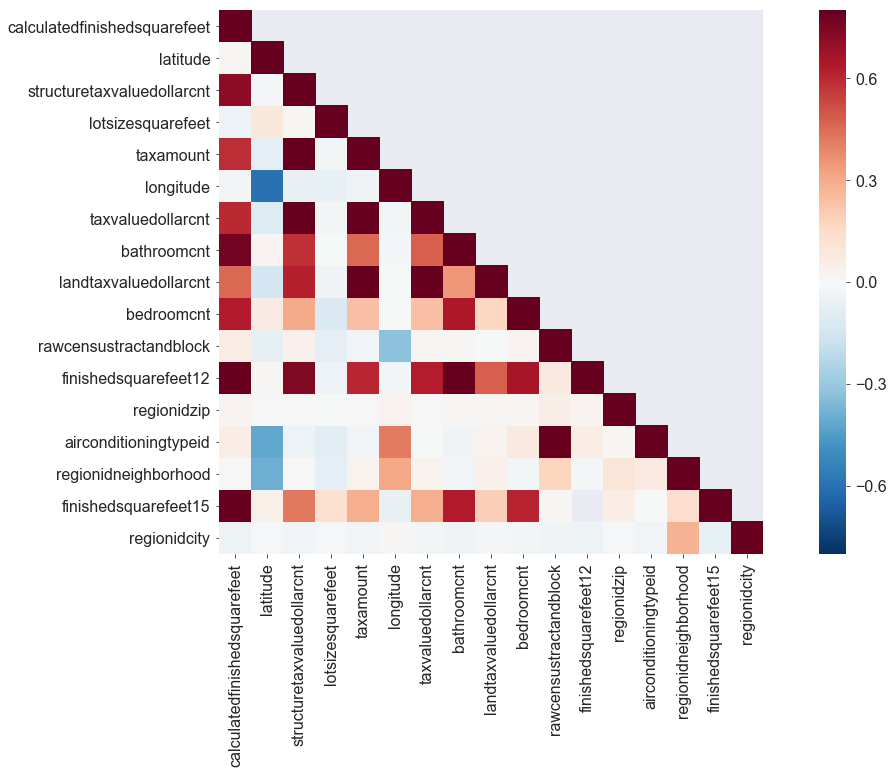

In [77]:
topFeatures = features["features"].tolist()[:20]
corrMatt = merged[topFeatures].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True)

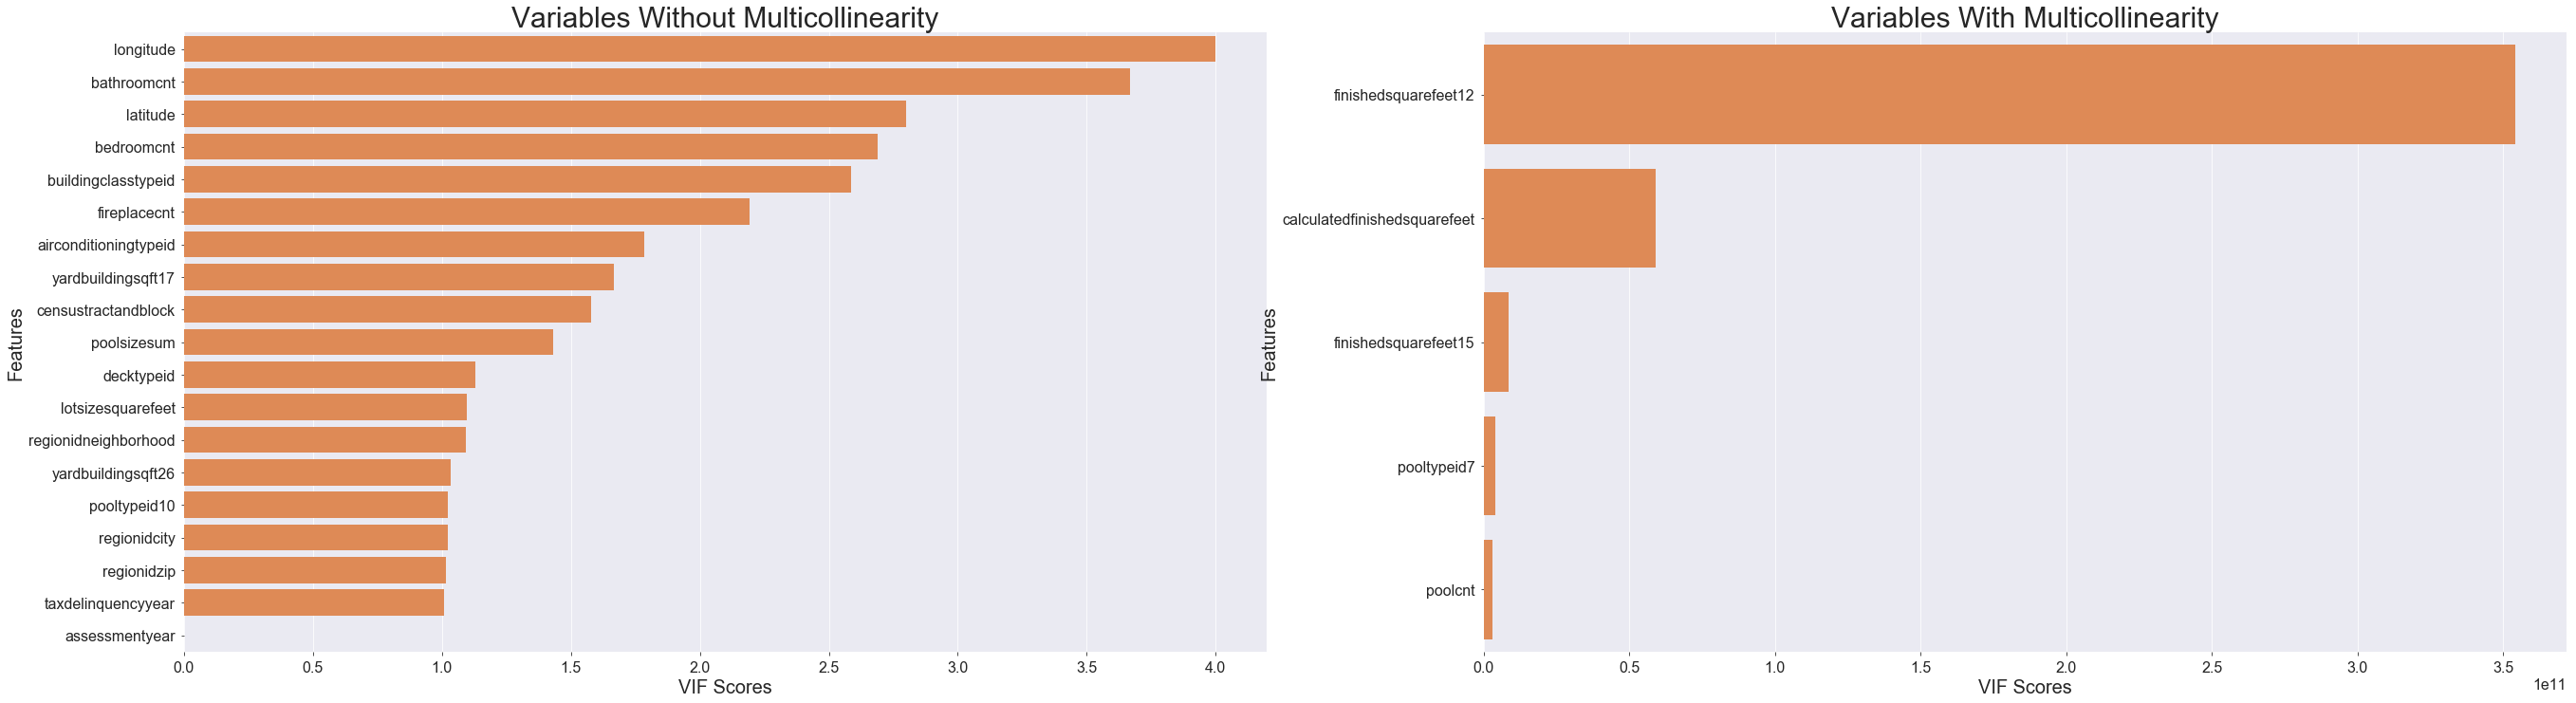

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in merged.columns:
    #print (f)
    if merged[f].dtype!='object' and f not in ["parcelid", "transactiondate", "logerror"]:
        numericalCol.append(f)
mergedFilterd = merged[numericalCol].fillna(-999)
vifDict = calculate_vif_(mergedFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]


fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(45,12)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#f5853f")
sns.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#f5853f")
#ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax1.set_xlabel('VIF Scores',fontsize=20)
ax1.set_ylabel('Features',fontsize=20)
ax1.set_title("Variables Without Multicollinearity",fontsize=30)
ax2.set_xlabel('VIF Scores',fontsize=20)
ax2.set_ylabel('Features',fontsize=20)
ax2.set_title("Variables With Multicollinearity",fontsize=30)
#ax2.set(xlabel=, ylabel='Features',title="Variables With Multicollinearity")

 None]

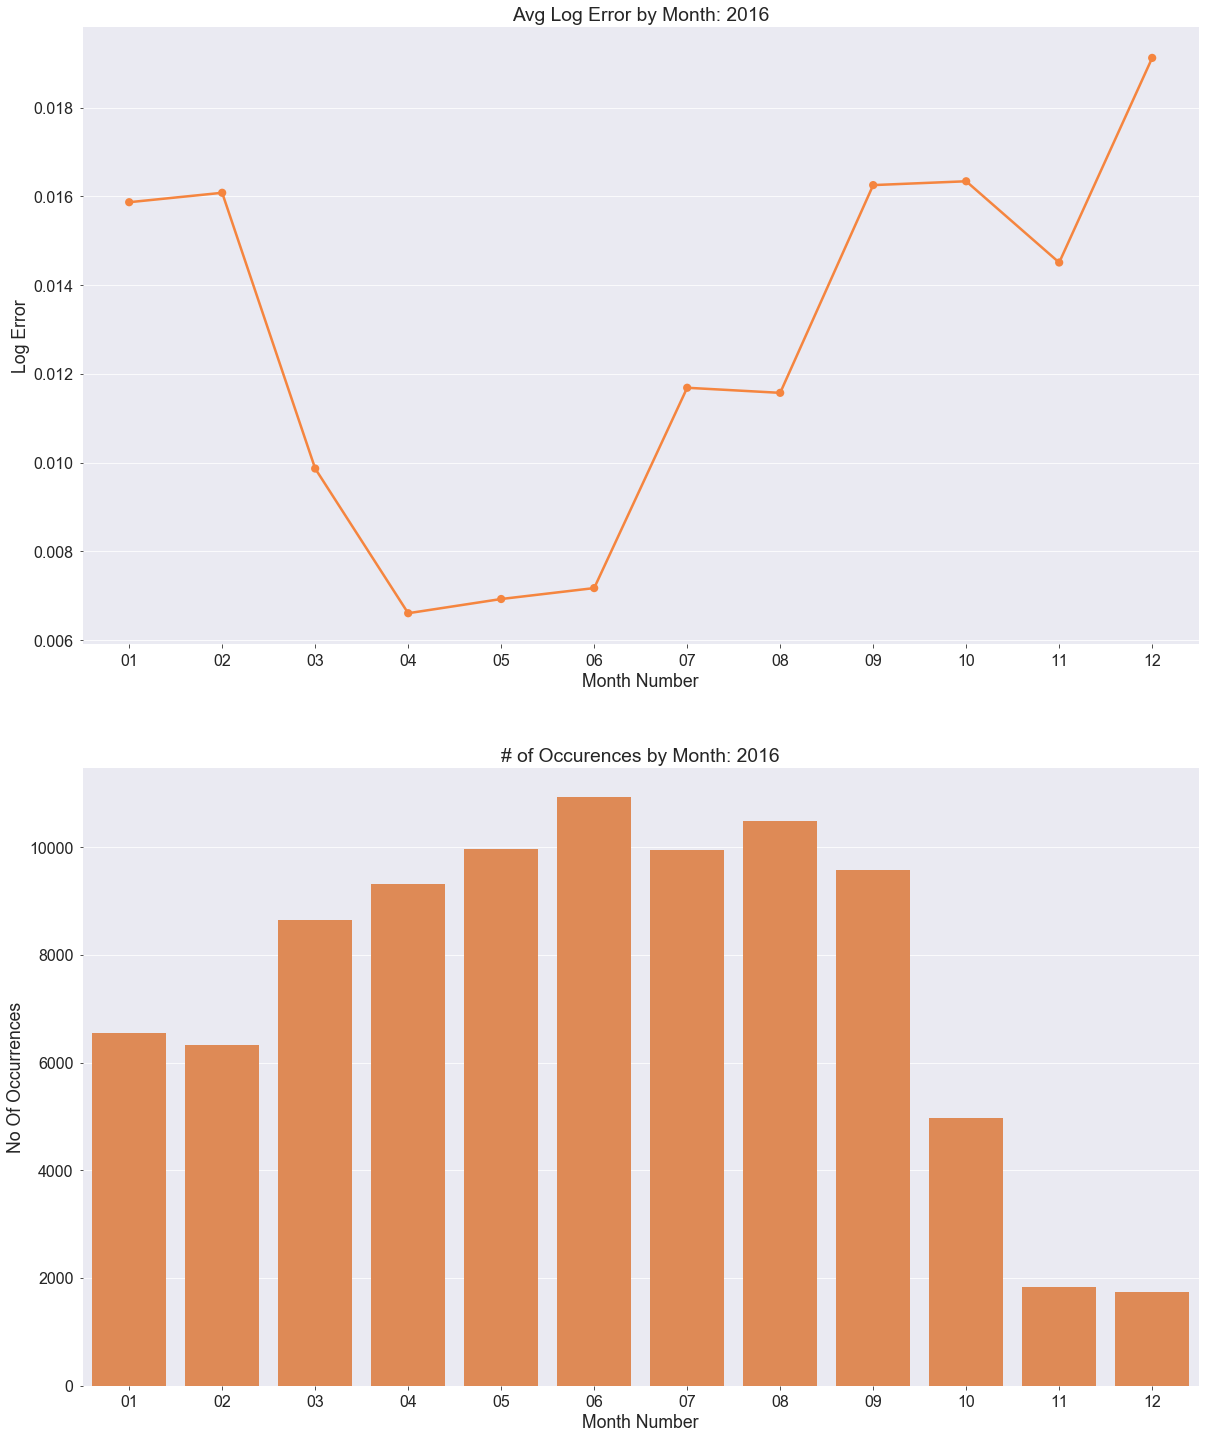

In [79]:
train["year"] = train.transactiondate.map(lambda x: str(x).split("-")[0])
train["month"] = train.transactiondate.map(lambda x: str(x).split("-")[1])
train["day"] = train.transactiondate.map(lambda x: str(x).split("-")[2].split()[0])

traingroupedMonth = train.groupby(["month"])["logerror"].mean().to_frame().reset_index()
traingroupedDay = train.groupby(["day"])["logerror"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,25)


sns.pointplot(x=traingroupedMonth["month"], y=traingroupedMonth["logerror"], data=traingroupedMonth, join=True,ax=ax1,color="#f5853f")
ax1.set(xlabel='Month Number', ylabel='Log Error',title="Avg Log Error by Month: 2016",label='big')

sns.countplot(x=train["month"], data=train,ax=ax2,color="#f5853f")
ax2.set(xlabel='Month Number', ylabel='No Of Occurrences',title="# of Occurences by Month: 2016",label='big')

 None]

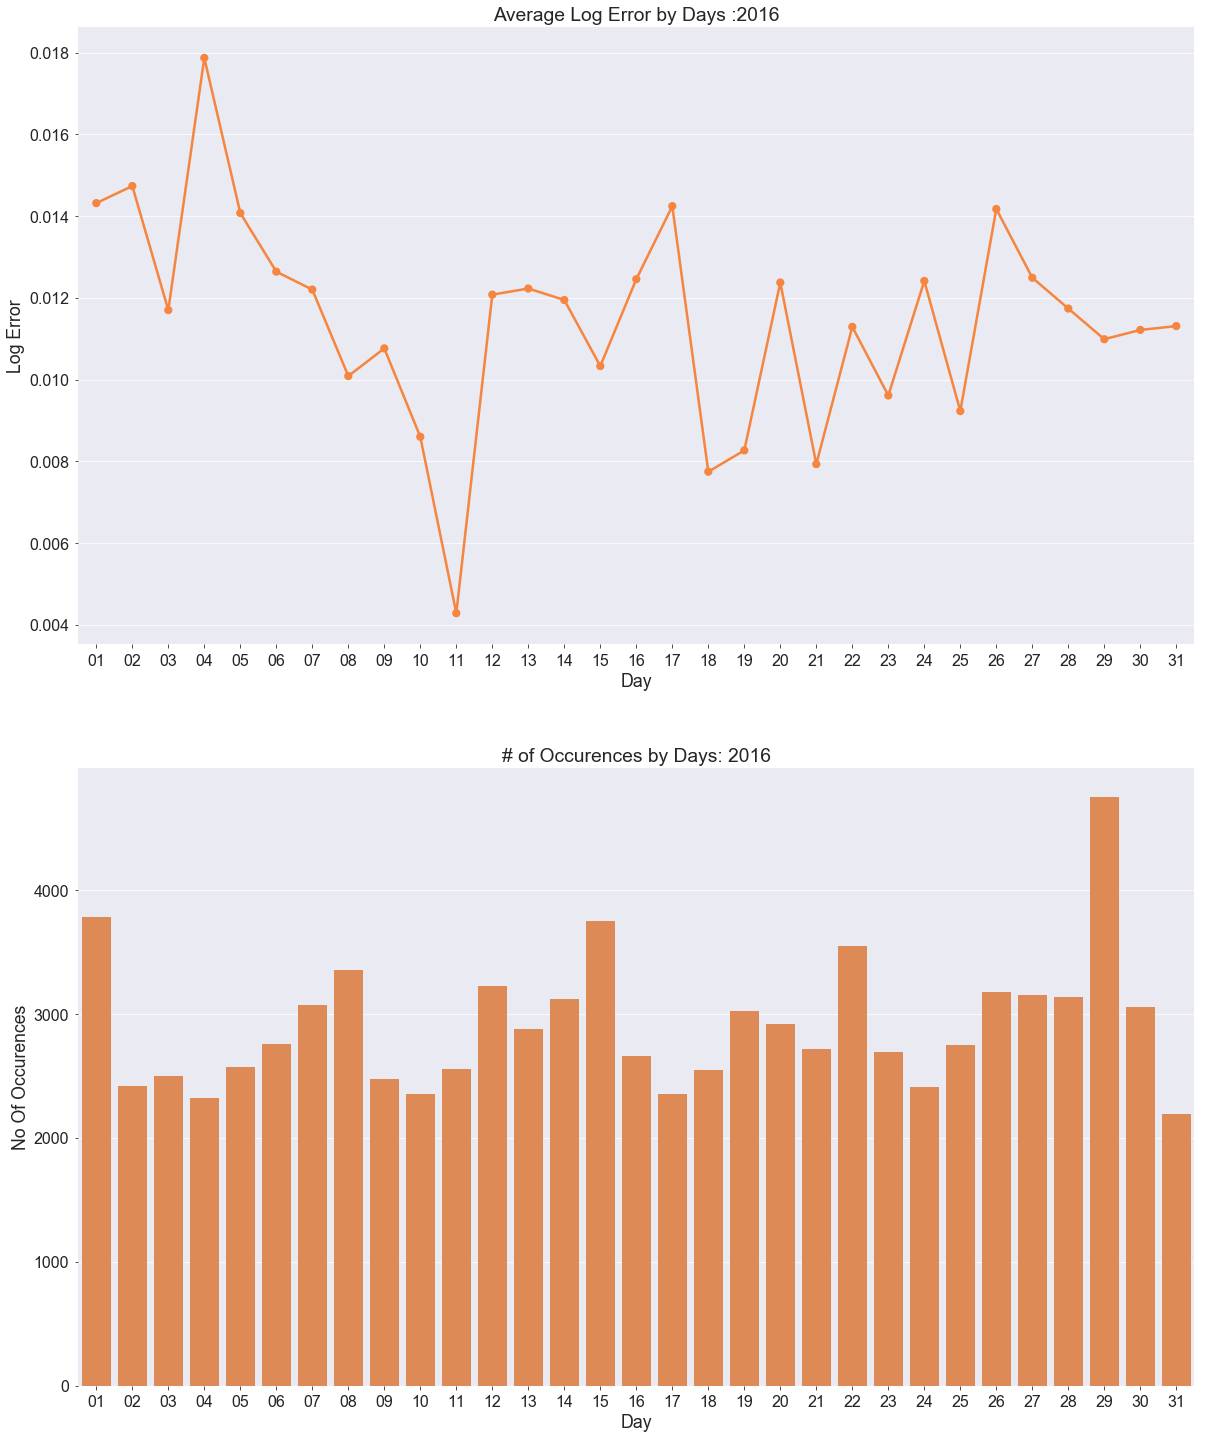

In [80]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,25)

sns.pointplot(x=traingroupedDay["day"], y=traingroupedDay["logerror"], data=traingroupedDay, join=True,ax=ax1,color="#f5853f")
ax1.set(xlabel='Day', ylabel='Log Error',title="Average Log Error by Days :2016",label='big')

sns.countplot(x=train["day"], data=train,ax=ax2,color="#f5853f")
ax2.set(xlabel='Day', ylabel='No Of Occurences',title="# of Occurences by Days: 2016",label='big')

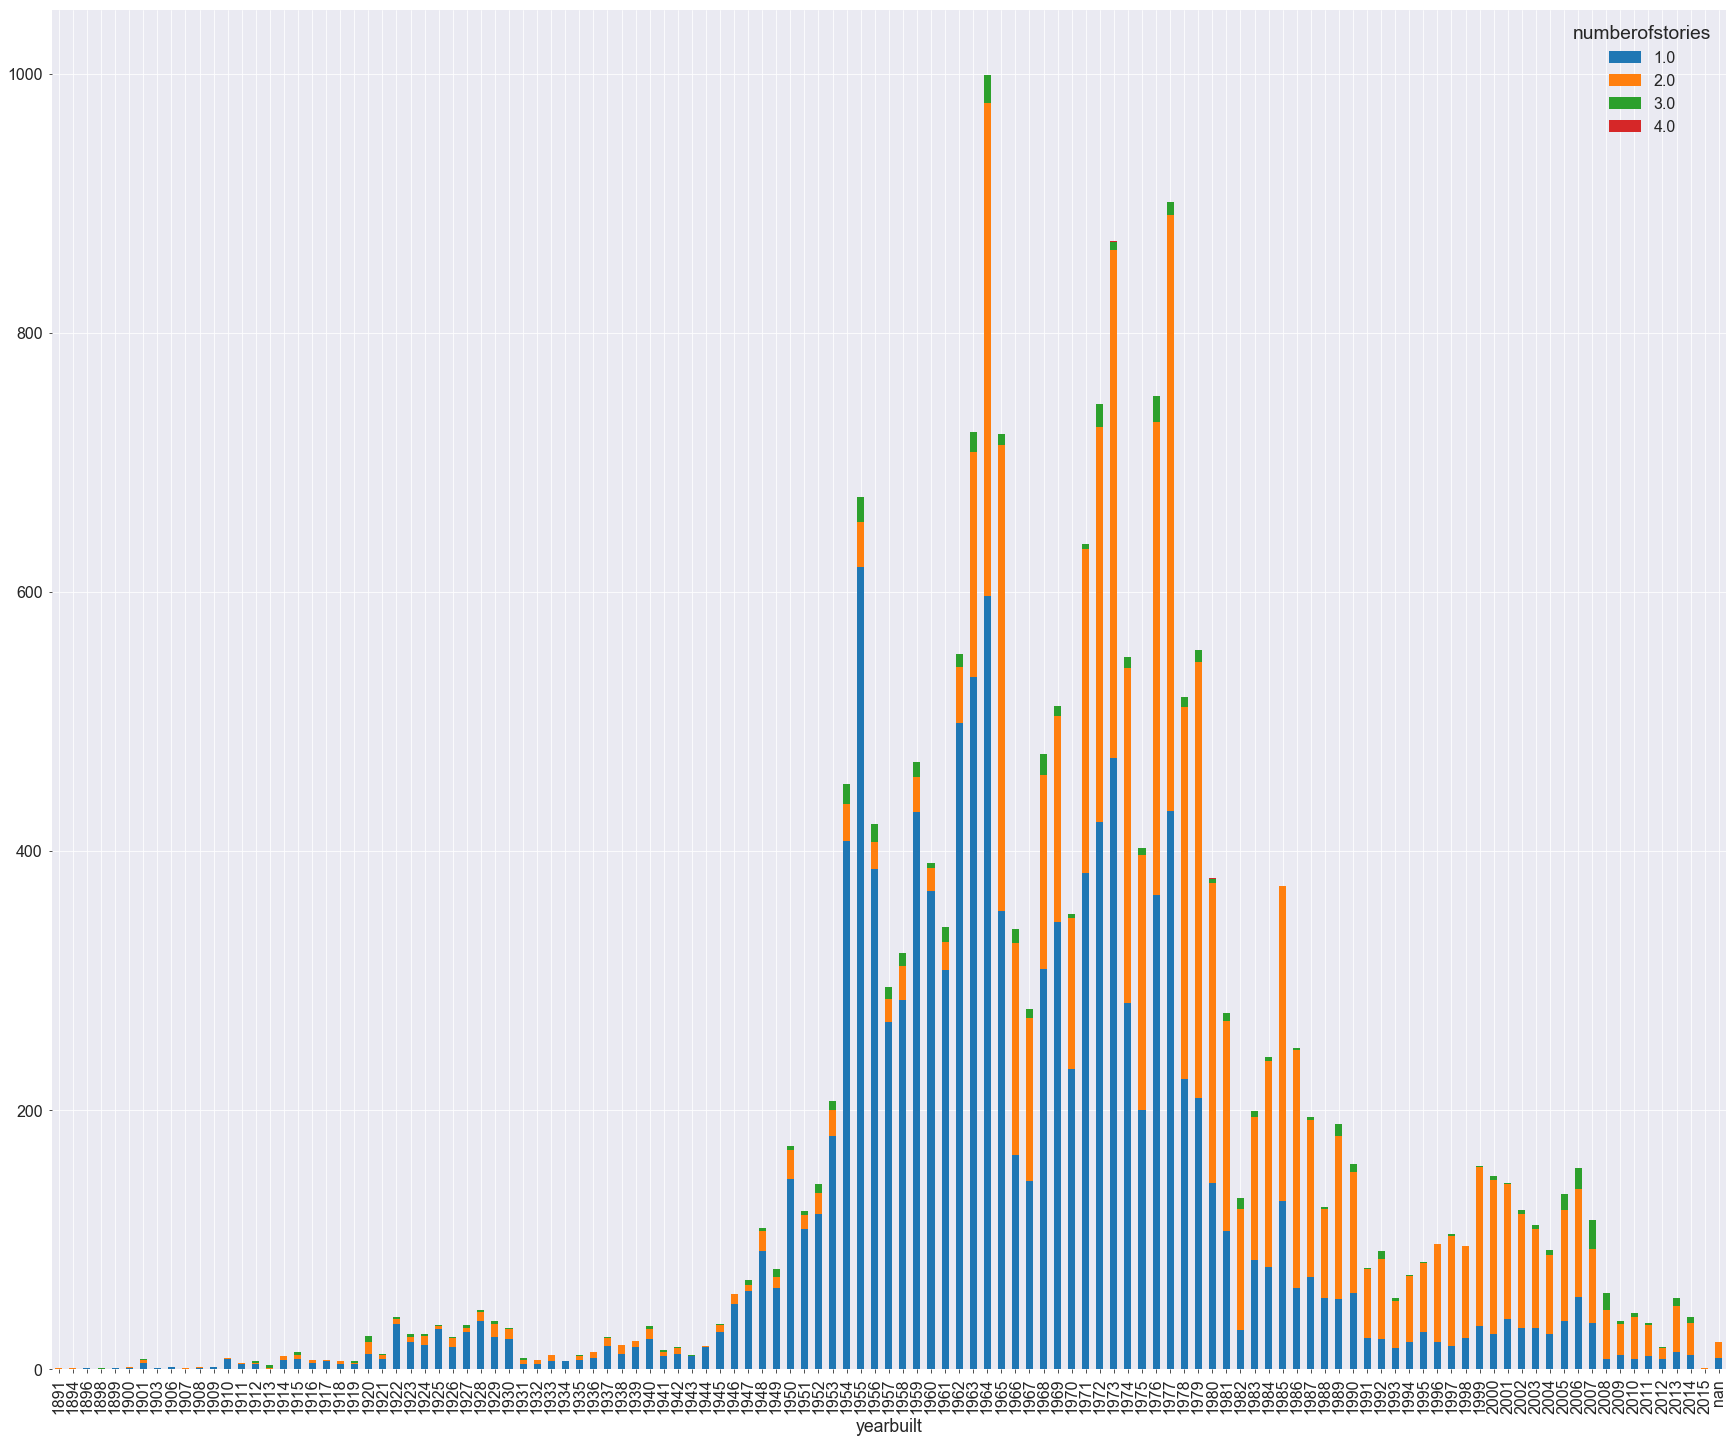

In [81]:
fig,ax1= plt.subplots()
fig.set_size_inches(30,25)
merged["yearbuilt"] = merged["yearbuilt"].map(lambda x:str(x).split(".")[0])
yearMerged = merged.groupby(['yearbuilt', 'numberofstories'])["parcelid"].count().unstack('numberofstories').fillna(0)
yearMerged.plot(kind='bar', stacked=True,ax=ax1)

In [48]:
cols = ["bathroomcnt","bedroomcnt","roomcnt","numberofstories","logerror","calculatedfinishedsquarefeet"]
mergedFiltered = merged[cols].dropna()
for col in cols:
    ulimit = np.percentile(mergedFiltered[col].values, 99.5)
    llimit = np.percentile(mergedFiltered[col].values, 0.5)
    mergedFiltered[col].ix[mergedFiltered[col]>ulimit] = ulimit
    mergedFiltered[col].ix[mergedFiltered[col]<llimit] = llimit

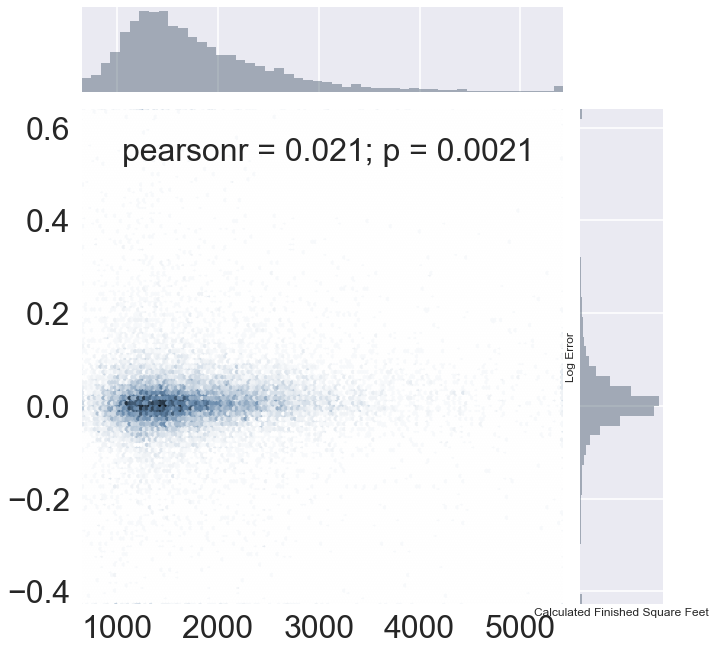

In [50]:
plt.figure(figsize=(8,8))
sns.jointplot(x=mergedFiltered.calculatedfinishedsquarefeet.values, y=mergedFiltered.logerror.values, size=10,kind="hex",color="#34495e")
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Calculated Finished Square Feet', fontsize=12)
plt.show()

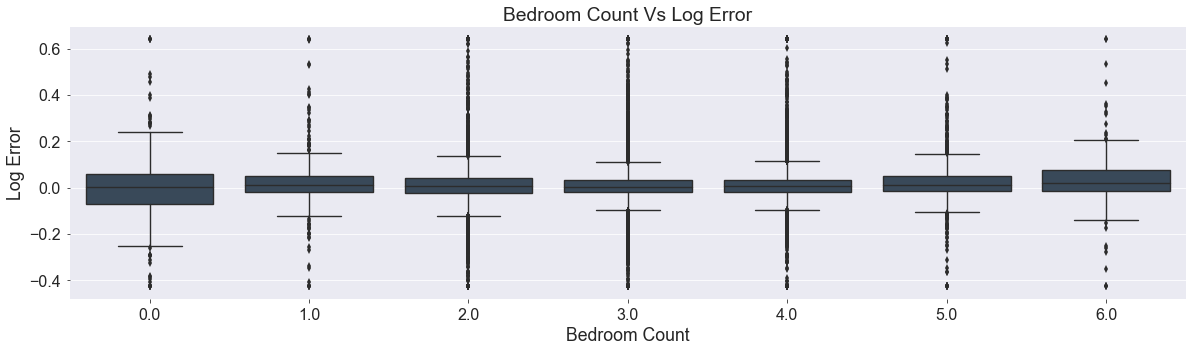

In [82]:
# bedroom count v logerror
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="bedroomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Bedroom Count",title="Bedroom Count Vs Log Error")

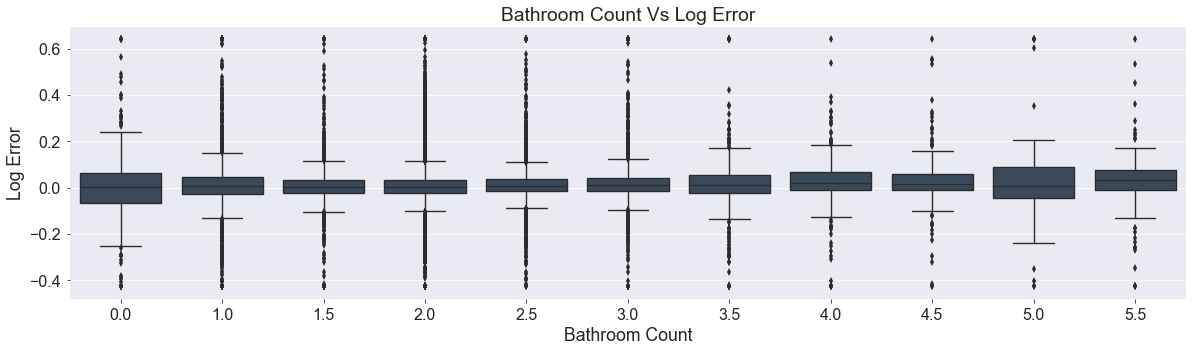

In [83]:
# bathroom count v log error
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="bathroomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Bathroom Count",title="Bathroom Count Vs Log Error")

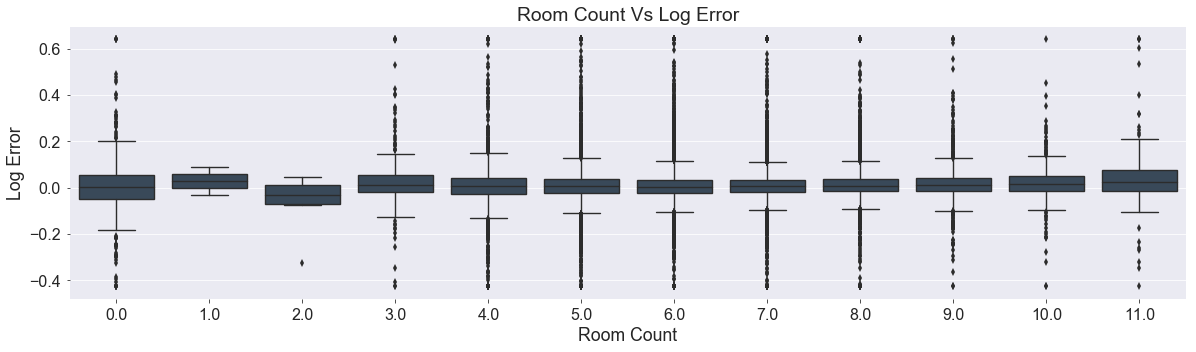

In [84]:
# room count v log error
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="roomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Room Count",title="Room Count Vs Log Error")

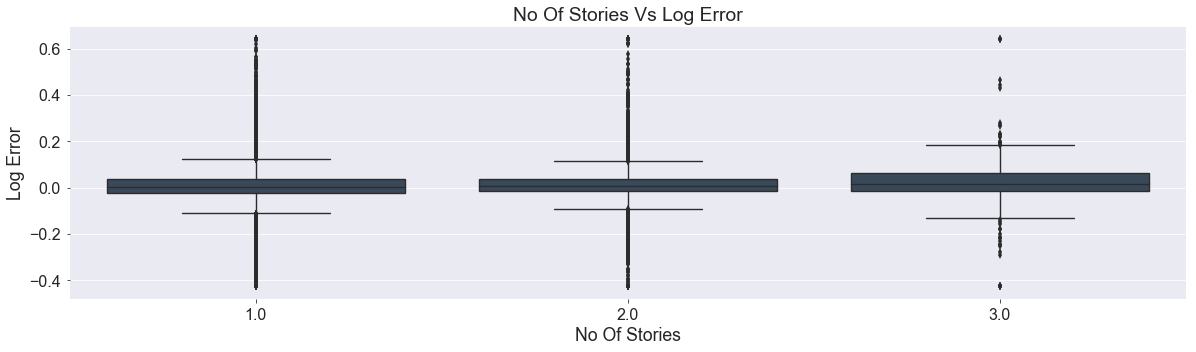

In [85]:
# stories v log error
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="numberofstories", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="No Of Stories",title="No Of Stories Vs Log Error")